In [1]:
# 라이브러리 호출
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

In [2]:
cd 언론사별

C:\Users\h_j06\Desktop\DMF\2nd_project\언론사별


C:\Users\h_j06\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# pkl 파일을 읽고 corpus, tfs 및 dtm 생성
# [참고] pkl 파일로 저장할 때 지정한 파이썬 객체의 개수만큼 변수를 지정해야 함
corpus, tfs, dtm = pd.read_pickle(filepath_or_buffer = 'media1_Text_Prep.pkl')

In [4]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환
fontList = fm.findSystemFonts(fontext = 'ttf')

# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명 선택
fontPath = [font for font in fontList if 'Gowun' in font]

# 반복문으로 컴퓨터에 설치한 폰트명 출력
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Gowun Batang
Gowun Batang


In [5]:
# 한글폰트와 글자 크기 설정
# [참고] 폰트를 설치하고 .matplotlib 폴더에서 fontlist-v3xx.json 파일을 삭제해야 함
plt.rc(group = 'font', family = 'Gowun Batang', size = 10)

# 그래프 크기와 해상도 설정
plt.rc(group = 'figure', figsize = (24, 12), dpi = 100)

In [6]:
# 단어 간 상관계수 행렬 생성
# [참고] 열(차원) 개수가 많을수록 오래 걸림
corMat = dtm.corr().round(4)

In [7]:
# 키워드 연관 단어로 막대 그래프를 그리는 함수 생성
def plot_assocs(keyword, n = 10, pal = 'Greys_r'):
    assocs = corMat[keyword].sort_values(ascending = False).head(n = n+1).iloc[1:]
    sns.barplot(x = assocs.index, y = assocs.values, hue = assocs.index, palette = pal)
    plt.title(label = '연관 단어 목록')
    plt.xlabel(xlabel = '고빈도 단어')
    plt.ylim(0, 1.0)
    for i, v in enumerate(assocs):
        plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom')

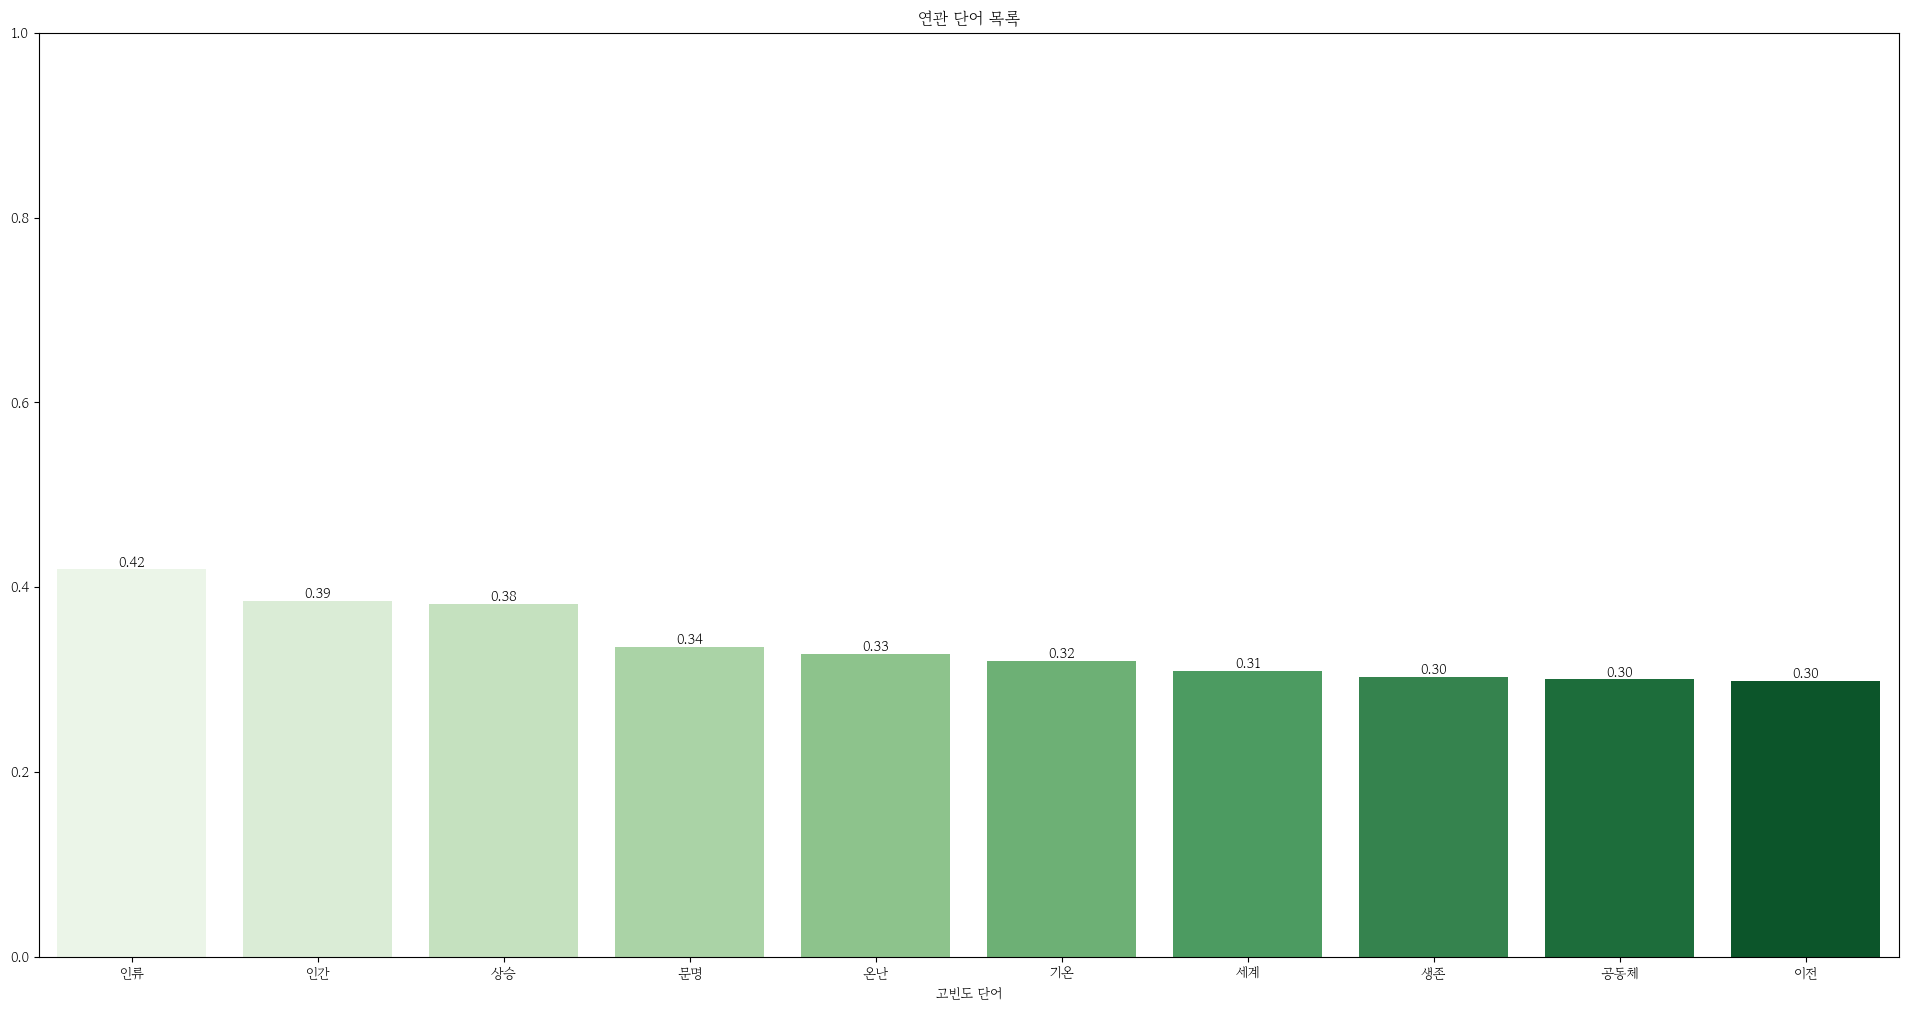

In [22]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '지구', pal = 'Greens')
plt.savefig('media1_연관단어_지구.png')
plt.show()